In [6]:
import pandas as pd 
from sklearn.model_selection import train_test_split

data = pd.read_csv("sampled_data_30.csv", header=None)
m_r_p = data.iloc[1:,:-1]
star_type = data.iloc[1:,-1]

X_train, X_test, y_train, y_test = train_test_split(m_r_p, star_type, test_size=0.2, random_state=42)


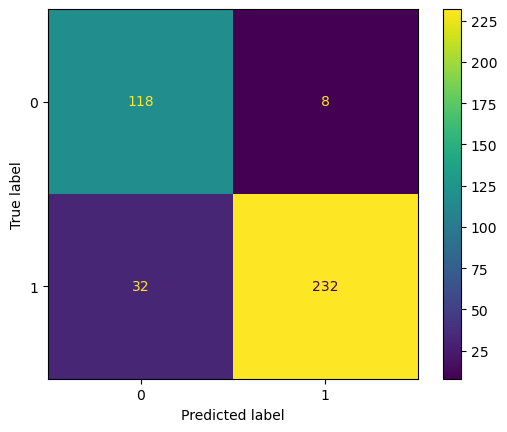

accuracy score:89.74%
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       126
           1       0.97      0.88      0.92       264

    accuracy                           0.90       390
   macro avg       0.88      0.91      0.89       390
weighted avg       0.91      0.90      0.90       390



In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report ,accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
classifier = DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=1, min_samples_split=5, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
prediction = classifier.predict(X_test)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()
print(f"accuracy score:{accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))


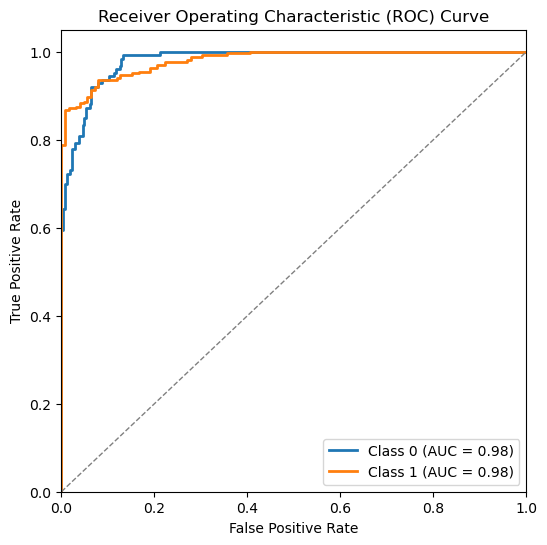

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  roc_curve, auc
import matplotlib.pyplot as plt


# Train RandomForest model
classifier = RandomForestClassifier(n_estimators=500, criterion="entropy", max_depth=12, max_features="log2", random_state=0)
classifier.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_test_proba = classifier.predict_proba(X_test)
# Compute ROC curve and AUC score for each class
plt.figure(figsize=(6, 6))
for i, class_label in enumerate(classifier.classes_):
    fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, i], pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

# Plot ROC Curve
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=1) 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
